In [19]:
import pandas as pd
from alerce.core import Alerce
from astropy.time import Time
import matplotlib.pylab as plt
#alerce = Alerce()
client = Alerce()


In [10]:
def get_objects_per_class(classearly="SN", pclassearly=0.5, min_nobs=10, max_nobs=50, n_objects=100):

    min_firstmjd = Time("2017-11-01T00:00:00", format="isot", scale="utc").mjd + 70

    objects = client.query_objects(classifier="stamp_classifier",
                                   class_name=classearly,
                                   probability=pclassearly,
                                   ndet=[1, 50],
                                   #order_by="probability",
                                   #order_mode="DESC",
                                   count=False,
                                   first_mjd=[min_firstmjd, None],
                                   page_size=n_objects, 
                                   format='pandas')
    print(objects.shape)
    objects.head()
    objects.set_index("oid", inplace=True)
    objects.sort_values(by="ndet", inplace=True, ascending=False)
    return objects

In [11]:
n_objects = 5000 # Objects per class to query
early_classes = ["AGN", "SN", "VS", "asteroid", "bogus"] # Class identifiers to query objects
objects = {} # Initialize dictionary to use the results per class
min_nobs = 1
for i, cl in enumerate(early_classes):
    print(cl)
    objects[cl] = get_objects_per_class(classearly=cl, min_nobs=min_nobs, n_objects=n_objects)
    if i==0:
        print("Result of a query using the ALeRCE client")
        display(objects[cl].head())
        print("Columns available", objects[cl].columns)


AGN
(5000, 23)
Result of a query using the ALeRCE client


,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,g_r_mean,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
oid,,,,,,,,,,,,,,,,,,,,,
ZTF19aaabiaj,119,1063,58322.472639,60547.424722,True,False,50,NaN,NaN,NaN,...,60547.424722,2091.210590,42.886714,62.335454,0.183073,0.085000,AGN,stamp_classifier,0.617298,24.5.2a6
ZTF19aadgefn,197,4502,58262.243669,60438.205556,True,False,50,0.042528,0.207097,-0.057215,...,60438.205556,1658.688901,171.137495,41.808351,0.032960,0.024568,AGN,stamp_classifier,0.776623,24.4.1
ZTF22abrqbja,67,1148,59170.429526,60293.394410,True,False,50,0.820638,0.956351,0.719391,...,60294.285509,384.904074,80.045033,21.374906,0.030208,0.028131,AGN,stamp_classifier,0.697749,1.2.1
ZTF19aabywrp,75,548,58469.500000,60115.250000,True,False,50,-0.176073,0.207590,-0.131811,...,60115.250255,1645.745336,202.254622,-9.608355,0.000059,0.000045,AGN,stamp_classifier,0.664824,1.2.0
ZTF22abvgefk,123,1081,58789.507315,60462.192303,True,False,50,0.283403,0.462370,0.023893,...,60462.192303,555.673275,163.984216,18.788446,0.044892,0.042500,AGN,stamp_classifier,0.745868,24.5.1


Columns available Index(['ndethist', 'ncovhist', 'mjdstarthist', 'mjdendhist', 'corrected',
       'stellar', 'ndet', 'g_r_max', 'g_r_max_corr', 'g_r_mean',
       'g_r_mean_corr', 'firstmjd', 'lastmjd', 'deltajd', 'meanra', 'meandec',
       'sigmara', 'sigmadec', 'class', 'classifier', 'probability',
       'step_id_corr'],
      dtype='object')
SN
(5000, 23)
VS
(5000, 23)
asteroid
(5000, 23)
bogus
(5000, 23)


In [14]:
#stamps = client.get_stamps(oid[0])
stamps = client.get_stamps("ZTF19aaabiaj")

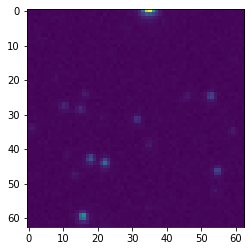

In [20]:
plt.imshow(stamps[0].data)